<a href="https://colab.research.google.com/github/Loismills/8663_Churning_Customers/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.models import load_model
from keras.models import Model
from keras.wrappers.scikit_learn import KerasClassifier

Importing Dataset

In [3]:
churn = pd.read_csv("/content/drive/MyDrive/CustomerChurn_dataset.csv")

In [4]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn.drop(["customerID"],axis=1,inplace = True)

In [7]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
churn = pd.DataFrame(churn)

In [9]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Picking out the columns with categorical values

In [10]:
churn_categorical = churn.select_dtypes(include=['object']).columns

In [11]:
churn_categorical

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

Encoding

In [12]:
for col in churn_categorical:
    churn[col], _ = pd.factorize(churn[col])

In [13]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,2,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,3,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,6526,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,6527,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,6528,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,6529,1


In [14]:
churn = pd.concat([churn], axis=1)

In [15]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


feature importance

In [16]:
X1 = churn.drop(['Churn'], axis=1)
y1 = churn[['Churn']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(random_state=42)

In [19]:
model.fit(X_train, y_train)

<ipython-input-19-d768f88d541e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
feature_importances = model.feature_importances_

In [21]:
feature_importance_churn = pd.DataFrame({'Feature': X1.columns, 'Importance': feature_importances})

In [22]:
feature_importance_churn = feature_importance_churn.sort_values(by='Importance', ascending=False)

In [23]:
important = feature_importance_churn.head(10)['Feature']

In [24]:
print("Top 10 Important Features:")
print(important)

Top 10 Important Features:
4               tenure
17      MonthlyCharges
18        TotalCharges
14            Contract
16       PaymentMethod
8       OnlineSecurity
11         TechSupport
0               gender
9         OnlineBackup
15    PaperlessBilling
Name: Feature, dtype: object


In [25]:
churn = churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 'gender', 'OnlineBackup', 'PaperlessBilling','Churn']]

In [26]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   MonthlyCharges    7043 non-null   float64
 2   TotalCharges      7043 non-null   int64  
 3   Contract          7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int64  
 5   OnlineSecurity    7043 non-null   int64  
 6   TechSupport       7043 non-null   int64  
 7   gender            7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  Churn             7043 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 605.4 KB


Exploratory data analysis

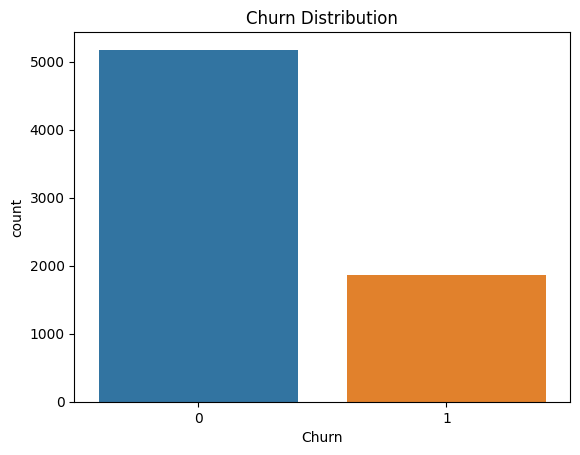

In [27]:
sns.countplot(x='Churn', data=churn)
plt.title('Churn Distribution')
plt.show()

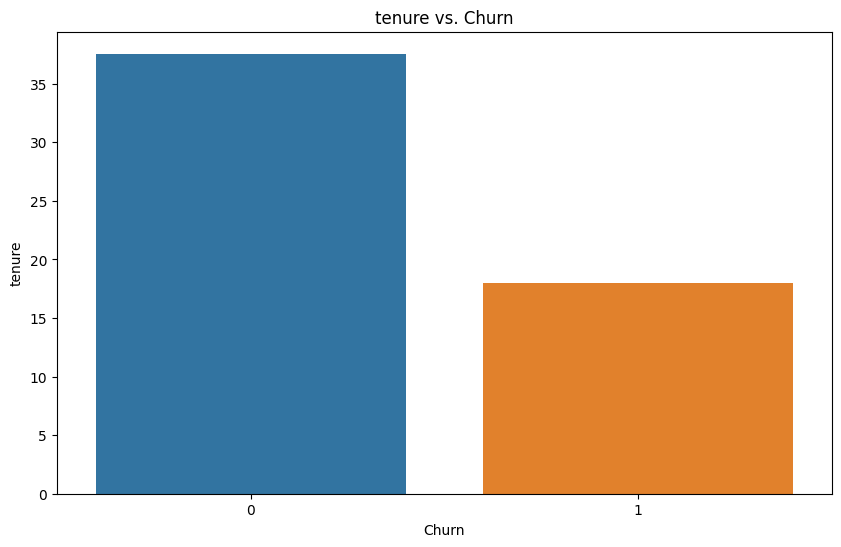

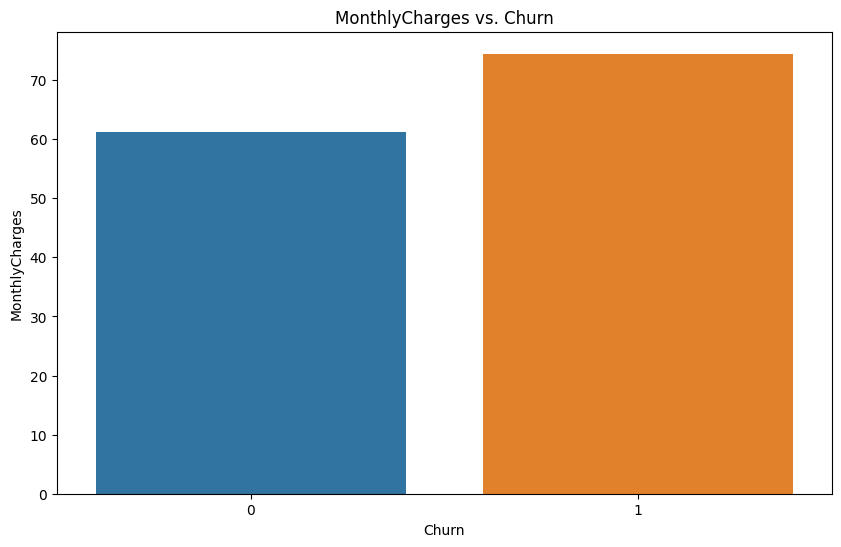

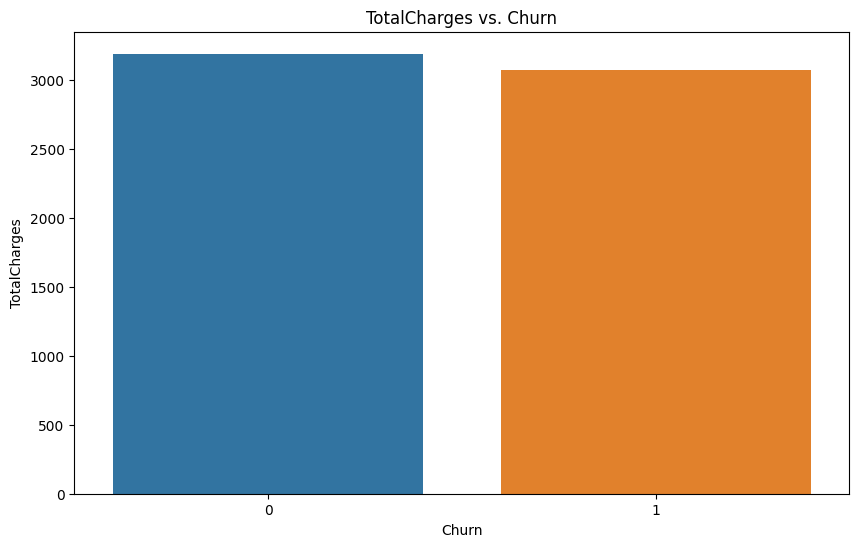

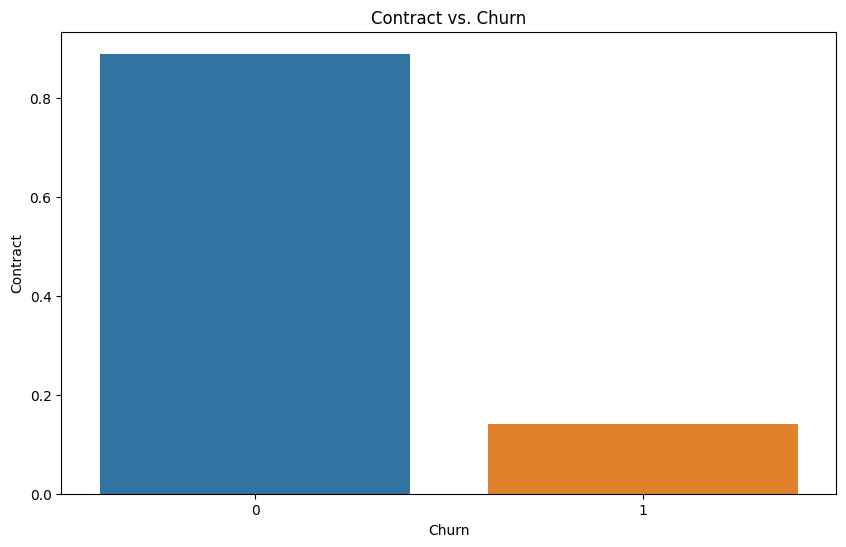

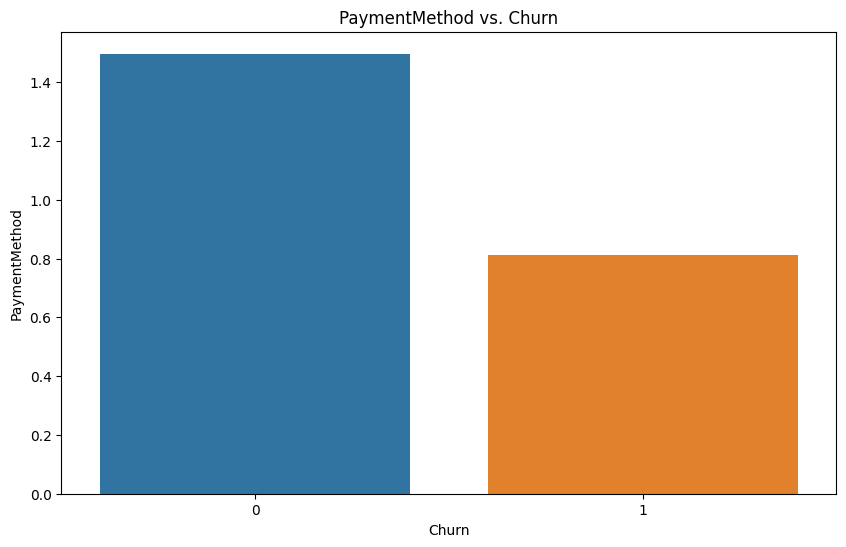

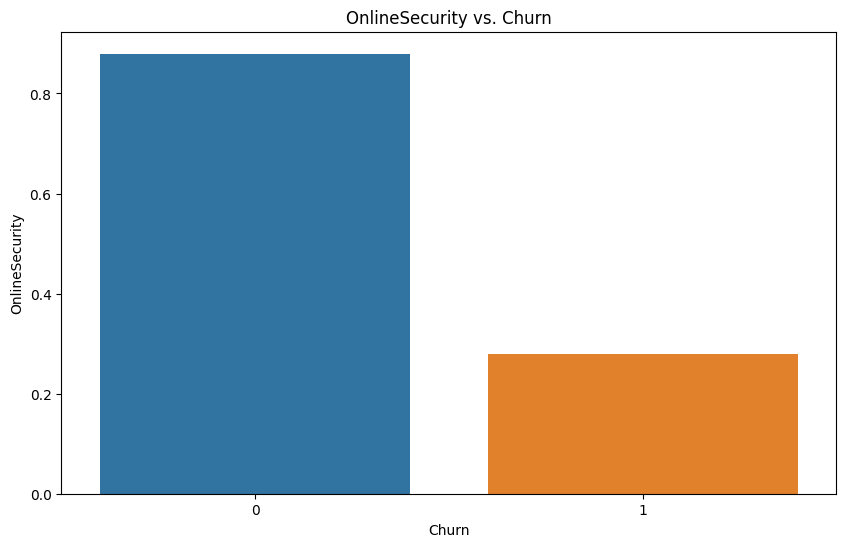

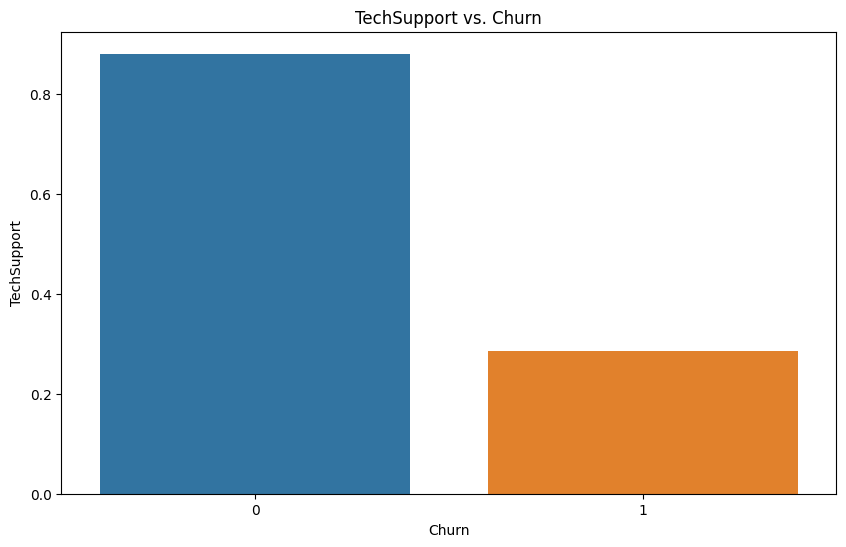

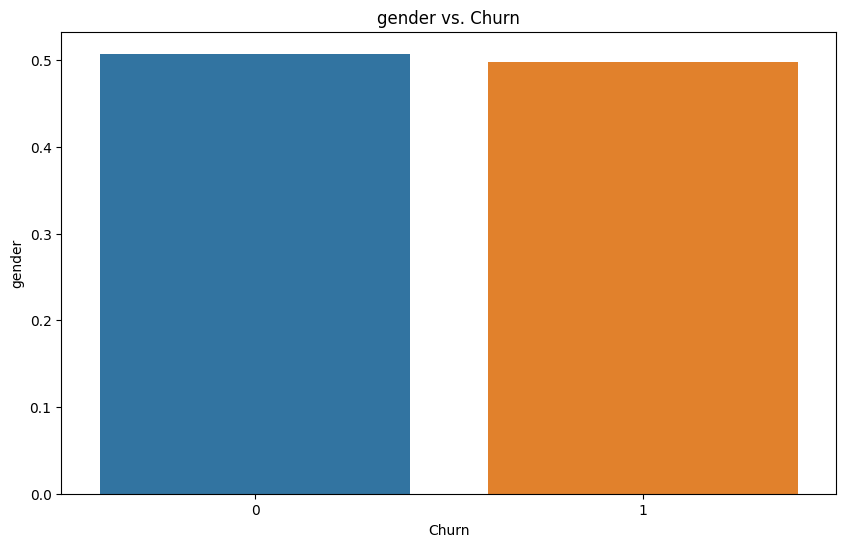

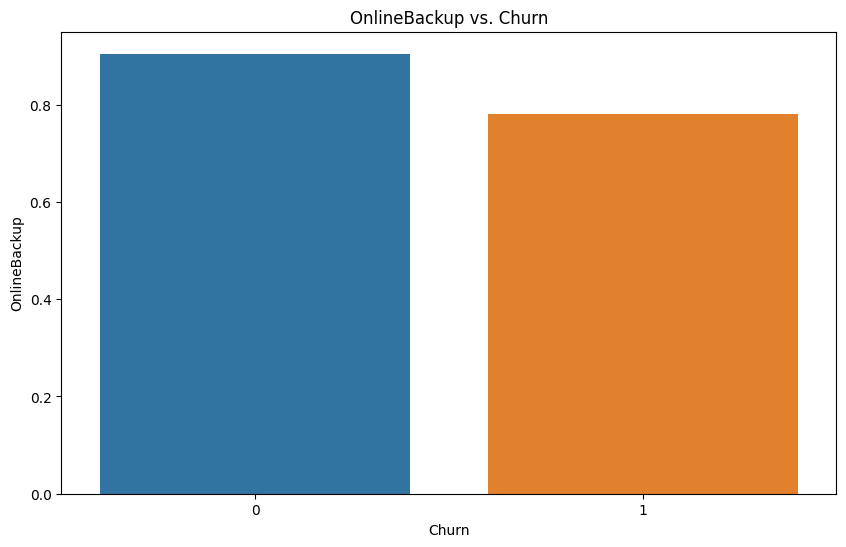

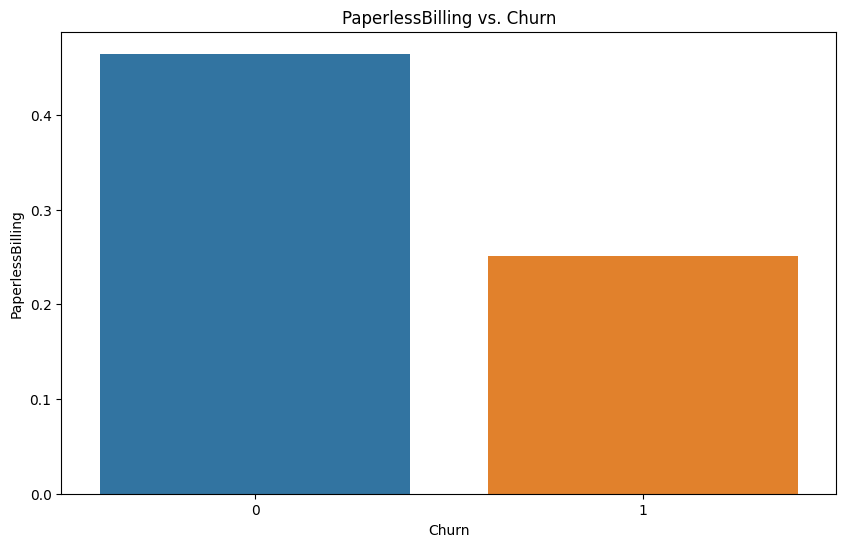

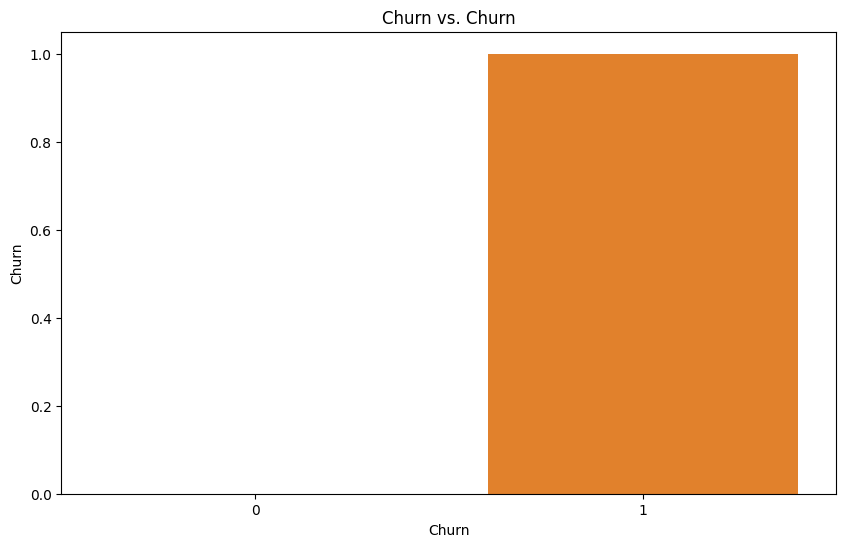

In [28]:
for col in churn.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Churn', y=col, data=churn, errorbar=None)
    plt.title(f'{col} vs. Churn')
    plt.show()

In [29]:
X = churn.drop('Churn', axis=1)
y = churn['Churn']

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
x=StandardScaler()

In [32]:
scaled = x.fit_transform(X)
churn = pd.DataFrame(scaled, columns=churn.columns.drop('Churn'))
X = churn

In [33]:
X

,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,OnlineSecurity,TechSupport,gender,OnlineBackup,PaperlessBilling
0,-1.277445,-1.160323,-1.667320,-0.828207,-1.145198,-0.903589,-0.909172,-1.009559,-1.180777,-0.829798
1,0.066327,-0.259629,-1.666793,0.371271,-0.274744,0.351386,-0.909172,0.990532,0.173655,1.205113
2,-1.236724,-0.362660,-1.666265,-0.828207,-0.274744,0.351386,-0.909172,0.990532,-1.180777,-0.829798
3,0.514251,-0.746535,-1.665737,0.371271,0.595711,0.351386,0.347362,0.990532,0.173655,1.205113
4,-1.236724,0.197365,-1.665210,-0.828207,-1.145198,-0.903589,-0.909172,-1.009559,0.173655,-0.829798
...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,1.776392,0.371271,-0.274744,0.351386,0.347362,0.990532,0.173655,-0.829798
7039,1.613701,1.277533,1.776920,0.371271,1.466165,-0.903589,-0.909172,-1.009559,-1.180777,-0.829798
7040,-0.870241,-1.168632,1.777448,-0.828207,-1.145198,0.351386,-0.909172,-1.009559,0.173655,-0.829798
7041,-1.155283,0.320338,1.777975,-0.828207,-0.274744,-0.903589,-0.909172,0.990532,0.173655,-0.829798


training a Multi-Layer Perceptron model using the Functional API with the selected features


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
def create_model(optimizer='adam', dropout_rate=0.2, activation='relu'):
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(64, activation=activation)(inputs)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [36]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

<ipython-input-36-842a9a16e965>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


In [37]:
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3],
    'activation': ['relu', 'tanh']
}

In [38]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

In [40]:
grid_result = grid.fit(X_train, y_train)

36/36 [==============================] - 0s 1ms/step


In [41]:
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)

45/45 [==============================] - 0s 2ms/step


Evaluating the model’s accuracy and calculate the AUC score

In [42]:
initial_accuracy = accuracy_score(y_test, y_pred1)
initial_auc = roc_auc_score(y_test, y_pred1)

In [43]:
print(f"Initial Model Accuracy: {initial_accuracy}")
print(f"Initial Model AUC Score: {initial_auc}")

Initial Model Accuracy: 0.8183108587650816
Initial Model AUC Score: 0.7512007411471218


In [44]:
best_model = grid_result.best_estimator_

In [45]:
best_model.fit(X_train, y_train)

In [46]:
y_pred_optimized = best_model.predict(X_test)

45/45 [==============================] - 0s 2ms/step


In [47]:
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_auc = roc_auc_score(y_test, y_pred_optimized)

In [48]:
print("Optimized Model Accuracy: ",optimized_accuracy)
print("Optimized Model AUC Score:" ,optimized_auc)

Optimized Model Accuracy:  0.8190205819730305
Optimized Model AUC Score: 0.7422469386276357


In [52]:
best_model.model.save('my_model.h5')